Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path("F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

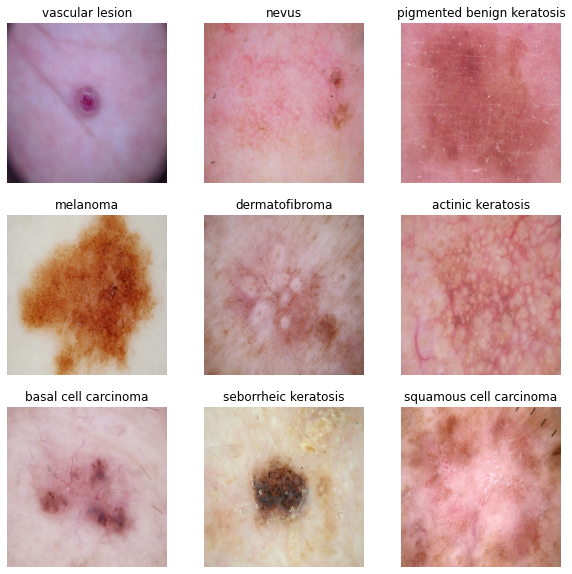

In [9]:
import matplotlib.pyplot as plt
l=[]  # null list is created which is populated in the below for loop
j=0
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        while (int(labels[i]) not in l): #This is given to make sure that labels are not repeated 
            l.append(int(labels[i])) #populating l with the label numbers from 0 to 8
            #print(l)
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            j=j+1



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 22s 224ms/step - loss: 2.0799 - accuracy: 0.1804 - val_loss: 1.9723 - val_accuracy: 0.2304
Epoch 2/20
56/56 [==============================] - 10s 172ms/step - loss: 1.9034 - accuracy: 0.2856 - val_loss: 1.6665 - val_accuracy: 0.4474
Epoch 3/20
56/56 [==============================] - 10s 176ms/step - loss: 1.6250 - accuracy: 0.4180 - val_loss: 1.5565 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 10s 178ms/step - loss: 1.4606 - accuracy: 0.4787 - val_loss: 1.5216 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 10s 180ms/step - loss: 1.4625 - accuracy: 0.4622 - val_loss: 1.4734 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 10s 178ms/step - loss: 1.2863 - accuracy: 0.5406 - val_loss: 1.3852 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 10s 179ms/step - loss: 1.2666 - accuracy: 0.5676 - val_loss: 1.3360 - val_accuracy: 0.5481

### Visualizing training results

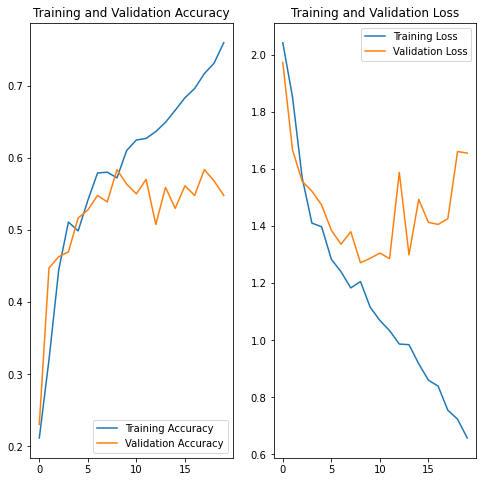

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### The models are severely overfitted with training accuracy very high and validation accuracy very low 

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

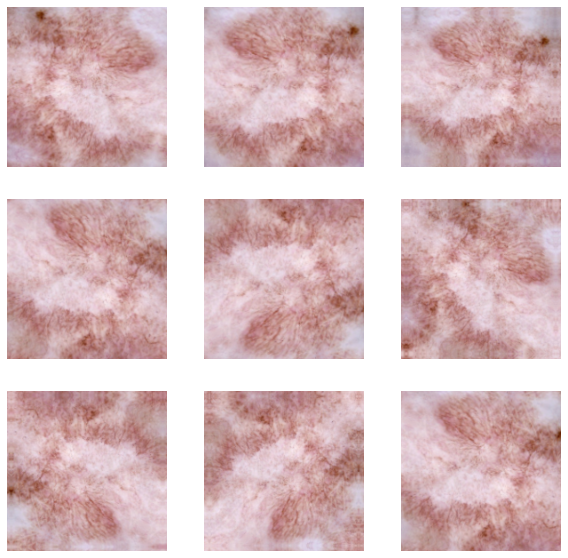

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images,labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model_aug_drop = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [19]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model_aug_drop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 14s 230ms/step - loss: 2.0369 - accuracy: 0.2011 - val_loss: 1.9441 - val_accuracy: 0.3110
Epoch 2/20
56/56 [==============================] - 13s 225ms/step - loss: 1.9298 - accuracy: 0.2961 - val_loss: 1.8830 - val_accuracy: 0.3043
Epoch 3/20
56/56 [==============================] - 13s 225ms/step - loss: 1.8834 - accuracy: 0.3009 - val_loss: 1.7538 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 13s 226ms/step - loss: 1.6848 - accuracy: 0.4044 - val_loss: 1.5551 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 13s 225ms/step - loss: 1.5710 - accuracy: 0.4262 - val_loss: 1.5536 - val_accuracy: 0.4452
Epoch 6/20
56/56 [==============================] - 13s 226ms/step - loss: 1.4442 - accuracy: 0.4893 - val_loss: 1.3622 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 13s 227ms/step - loss: 1.3527 - accuracy: 0.5238 - val_loss: 1.3886 - val_accuracy: 0.5101

### Visualizing the results

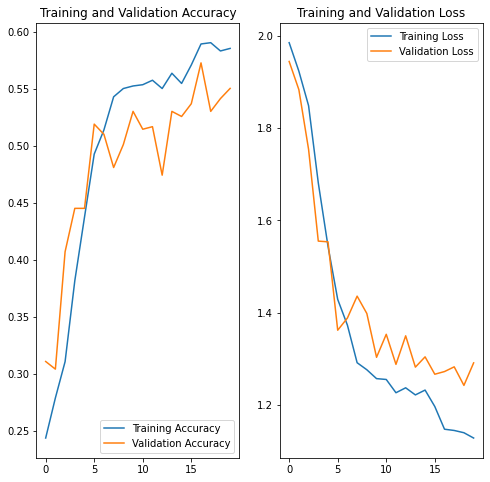

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After augmentation and dropout, the model fitting has improved tremendously. It no longer overfits. Though the accruacy is still around 60 and 55 for training and test set. 

This might be due to lower number of training data available 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
dic ={'Cancer_type':[],'Data_available':[]}

for name in class_names:
    a = name+'/*'
    n = len(list(data_dir_train.glob(a)))
    dic['Cancer_type'].append(name)
    dic['Data_available'].append(n)
cancer = pd.DataFrame.from_dict(dic)
cancer.sort_values(by='Data_available',ascending=False)

,Cancer_type,Data_available
5,pigmented benign keratosis,462
3,melanoma,438
1,basal cell carcinoma,376
4,nevus,357
7,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
2,dermatofibroma,95
6,seborrheic keratosis,77


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset="F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'\\'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BF6AC37F0>: 100%|█| 500/500 [00:03<00:00, 161.01 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BB91FB610>:   3%| | 14/500 [00:00<00:12, 37.85 Samples/s

Initialised with 376 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20BB8C5B940>: 100%|█| 500/500 [00:03<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BF6AAF400>:   3%| | 13/500 [00:00<01:07,  7.27 Samples/s

Initialised with 95 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BF6AB73A0>: 100%|█| 500/500 [00:03<00:00, 163.18 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x20B82FDFAC0>: 100%|█| 500/500 [00:15<00:00, 32.66 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x20BB87C2130>: 100%|█| 500/500 [00:14<00:00, 35.51 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20B8784A970>:   3%| | 15/500 [00:00<00:26, 18.07 Samples/s

Initialised with 462 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20BB8C5BA00>: 100%|█| 500/500 [00:03<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20BB87BC520>: 100%|█| 500/500 [00:07<00:00, 68.08 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BB87EB0D0>:   3%| | 16/500 [00:00<00:16, 29.78 Samples/s

Initialised with 181 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BB87BC940>: 100%|█| 500/500 [00:02<00:00, 169.11 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20BB871CBB0>:   2%| | 12/500 [00:00<00:51,  9.55 Samples/s

Initialised with 139 image(s) found.
Output directory set to F:\UPGRAD\5. Deep Learning\Module 3 - CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20B85116580>: 100%|█| 500/500 [00:02<00:00, 166.72 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
import glob

In [27]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_31d60c3b-e1c2-4f45-b942-87d2884111b1.jpg',
 'F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6a247e61-e7a7-4f87-88d1-c65d027f0928.jpg',
 'F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7c61ada2-8bbb-4b95-a90a-7fc41868c176.jpg',
 'F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a4266728-a293-4146-8c82-60c11ccf7315.jpg',
 'F:\\UPGRAD\\5. Deep Learni

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df_x = pd.DataFrame(df2['Label'].value_counts().reset_index().rename(columns={"index": "Cancer_type", "Label": "Data_available"}))
new_df = df_x+cancer

In [32]:
# New data frame with old and appended values 
new_df

,Cancer_type,Data_available
0,seborrheic keratosisactinic keratosis,614
1,melanomabasal cell carcinoma,876
2,nevusdermatofibroma,595
3,pigmented benign keratosismelanoma,938
4,basal cell carcinomanevus,857
5,actinic keratosispigmented benign keratosis,962
6,squamous cell carcinomaseborrheic keratosis,577
7,dermatofibromasquamous cell carcinoma,681
8,vascular lesionvascular lesion,639


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train="F:\\UPGRAD\\5. Deep Learning\\Module 3 - CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
model_aug_drop = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model_aug_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [38]:
epochs = 30

history = model_aug_drop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 58s 332ms/step - loss: 2.0415 - accuracy: 0.2132 - val_loss: 1.6452 - val_accuracy: 0.3660
Epoch 2/30
169/169 [==============================] - 58s 336ms/step - loss: 1.5765 - accuracy: 0.3857 - val_loss: 1.5024 - val_accuracy: 0.4306
Epoch 3/30
169/169 [==============================] - 58s 341ms/step - loss: 1.4614 - accuracy: 0.4361 - val_loss: 1.3997 - val_accuracy: 0.4543
Epoch 4/30
169/169 [==============================] - 58s 341ms/step - loss: 1.3950 - accuracy: 0.4528 - val_loss: 1.3124 - val_accuracy: 0.5071
Epoch 5/30
169/169 [==============================] - 58s 342ms/step - loss: 1.3105 - accuracy: 0.4904 - val_loss: 1.3538 - val_accuracy: 0.4855
Epoch 6/30
169/169 [==============================] - 59s 344ms/step - loss: 1.2794 - accuracy: 0.4975 - val_loss: 1.2666 - val_accuracy: 0.5085
Epoch 7/30
169/169 [==============================] - 59s 344ms/step - loss: 1.2433 - accuracy: 0.5237 - val_loss: 1.1681 - val_ac

#### **Todo:**  Visualize the model results

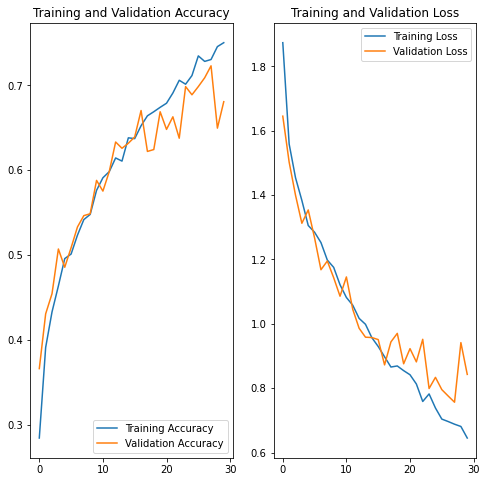

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance has solved the issue of underfitting and has givena fairly better model as compared to that of the previous models 